In [2]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv'); train, test

(                ID COMPONENT_ARBITRARY  ANONYMOUS_1  YEAR  \
 0      TRAIN_00000          COMPONENT3         1486  2011   
 1      TRAIN_00001          COMPONENT2         1350  2021   
 2      TRAIN_00002          COMPONENT2         2415  2015   
 3      TRAIN_00003          COMPONENT3         7389  2010   
 4      TRAIN_00004          COMPONENT3         3954  2015   
 ...            ...                 ...          ...   ...   
 14090  TRAIN_14090          COMPONENT3         1616  2014   
 14091  TRAIN_14091          COMPONENT1         2784  2013   
 14092  TRAIN_14092          COMPONENT3         1788  2008   
 14093  TRAIN_14093          COMPONENT2         2498  2009   
 14094  TRAIN_14094          COMPONENT2         1902  2012   
 
        SAMPLE_TRANSFER_DAY  ANONYMOUS_2  AG   AL    B  BA  ...     U25  \
 0                        7          200   0    3   93   0  ...     NaN   
 1                       51          375   0    2   19   0  ...     2.0   
 2                        2  

In [20]:
full_train = []
for i in train:
    if train[i].isna().sum() == 0:
        full_train.append(i)
    else:
        pass
    
same_col = []
for i in test.columns:
    if i in full_train:
        same_col.append(i)
    else:
        pass
len(same_col)

19

In [12]:
# 데이터 결측치 확인 -> train에는 다수의 column에 결측치가 존재하나 test에는 결측치 없음
train.isna().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

# EDA by Component_Arbitrary

## Component별 데이터

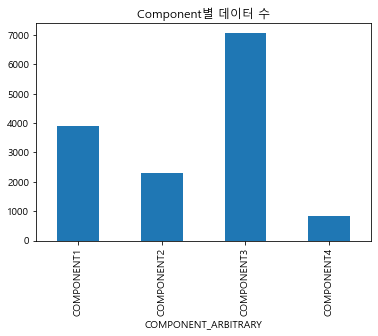

In [18]:
# 각 component별 데이터 수
train.groupby('COMPONENT_ARBITRARY')['ID'].count().plot(kind = 'bar', title = 'Component별 데이터 수')
plt.show()

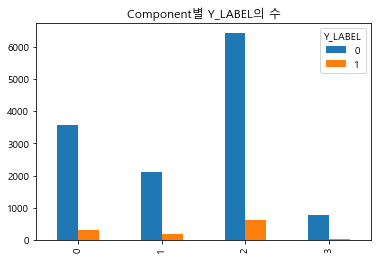

In [154]:
# 각 Component별 Y_LABEL의 수
train.groupby(['COMPONENT_ARBITRARY', 'Y_LABEL'])['ID'].count().reset_index().pivot(
    index = 'COMPONENT_ARBITRARY', columns = 'Y_LABEL', values = 'ID').reset_index().plot(
    kind = 'bar', title = 'Component별 Y_LABEL의 수')
plt.show()

### ANONYMOUS_1

In [155]:
# Component별 ANONYMOUS_1의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['ANONYMOUS_1'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,3046.162468,2979.489071,1000.0,1647.25,2225.5,3724.75,71569.0
1,COMPONENT2,2316.0,3023.936097,3229.111287,1000.0,1647.75,2176.0,3599.00,78418.0
2,COMPONENT3,7050.0,3227.621986,5016.905631,1000.0,1668.00,2243.5,3842.00,294451.0
3,COMPONENT4,839.0,3261.377831,4132.884507,1000.0,1583.00,2276.0,3859.00,67013.0


In [156]:
# Component의 Y_LABEL별 ANONYMOUS_1 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['ANONYMOUS_1'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,2988.373952,3018.142968,1000.0,1586.25,2147.0,3533.00,71569.0
1,COMPONENT1,1,312.0,3708.878205,2400.090795,1000.0,1884.00,3060.0,4584.50,12421.0
2,COMPONENT2,0,2110.0,2991.753081,3308.145223,1000.0,1601.00,2137.0,3531.75,78418.0
3,COMPONENT2,1,206.0,3353.577670,2245.622365,1000.0,1714.75,2424.0,4361.75,11570.0
4,COMPONENT3,0,6415.0,3159.409821,5055.421033,1000.0,1643.00,2166.0,3794.00,294451.0
5,COMPONENT3,1,635.0,3916.725984,4556.497723,1000.0,1890.00,2824.0,4642.00,64580.0
6,COMPONENT4,0,789.0,3235.581749,4217.708507,1000.0,1562.00,2222.0,3797.00,67013.0
7,COMPONENT4,1,50.0,3668.440000,2420.415339,1287.0,1739.25,2817.5,5029.00,11570.0


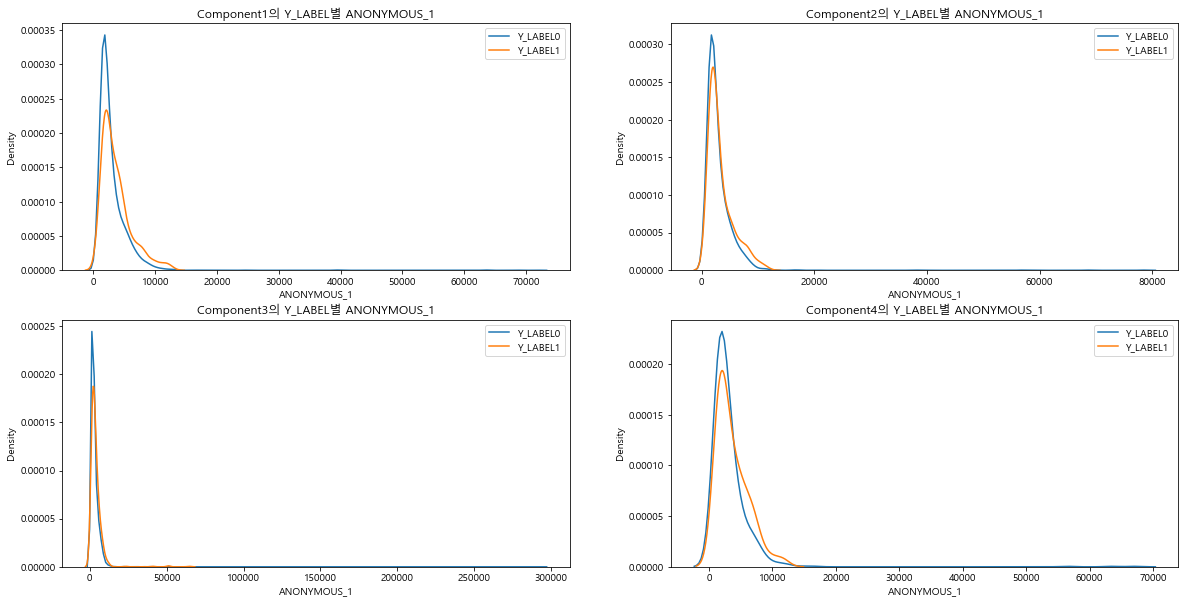

In [66]:
# Component의 Y_LABEL별 ANONYMOUS_1의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['ANONYMOUS_1'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['ANONYMOUS_1'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 ANONYMOUS_1')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['ANONYMOUS_1'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['ANONYMOUS_1'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 ANONYMOUS_1')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['ANONYMOUS_1'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['ANONYMOUS_1'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 ANONYMOUS_1')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['ANONYMOUS_1'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['ANONYMOUS_1'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 ANONYMOUS_1')

plt.show()

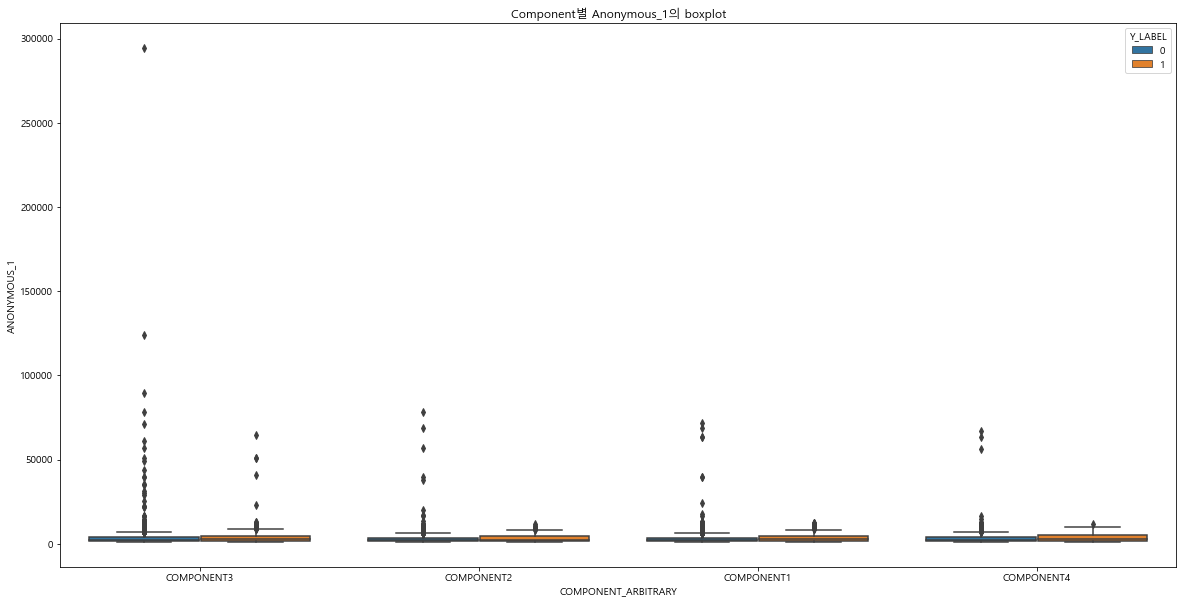

In [160]:
# Component별 ANONYMOUS_1의 boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x = 'COMPONENT_ARBITRARY', y = 'ANONYMOUS_1', hue = 'Y_LABEL', data = train)
plt.title('Component별 Anonymous_1의 boxplot')
plt.show()

### Year

In [36]:
# Component별 YEAR의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['YEAR'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,2013.729563,3.929682,2007.0,2011.0,2014.0,2017.0,2022.0
1,COMPONENT2,2316.0,2013.718912,3.925550,2007.0,2011.0,2014.0,2017.0,2022.0
2,COMPONENT3,7050.0,2013.494043,3.954276,2007.0,2010.0,2013.0,2016.0,2022.0
3,COMPONENT4,839.0,2014.443385,4.211455,2007.0,2011.0,2014.0,2018.0,2022.0


In [37]:
# Component의 Y_LABEL별 YEAR 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['YEAR'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,2013.835662,3.924909,2007.0,2011.0,2014.0,2017.0,2022.0
1,COMPONENT1,1,312.0,2012.512821,3.782660,2007.0,2009.0,2012.0,2015.0,2022.0
2,COMPONENT2,0,2110.0,2013.832227,3.925009,2007.0,2011.0,2014.0,2017.0,2022.0
3,COMPONENT2,1,206.0,2012.558252,3.747390,2007.0,2009.0,2012.0,2015.0,2022.0
4,COMPONENT3,0,6415.0,2013.596259,3.927713,2007.0,2010.0,2014.0,2017.0,2022.0
5,COMPONENT3,1,635.0,2012.461417,4.074969,2007.0,2009.0,2011.0,2015.0,2022.0
6,COMPONENT4,0,789.0,2014.537389,4.186658,2007.0,2011.0,2014.0,2018.0,2022.0
7,COMPONENT4,1,50.0,2012.960000,4.365729,2008.0,2009.0,2013.0,2015.5,2021.0


In [177]:
# Component별 YEAR의 count
train.groupby(['COMPONENT_ARBITRARY','YEAR'])['ID'].agg([('Year_count','count')]).reset_index()

,COMPONENT_ARBITRARY,YEAR,Year_count
0,COMPONENT1,2007,73
1,COMPONENT1,2008,389
2,COMPONENT1,2009,247
3,COMPONENT1,2010,225
4,COMPONENT1,2011,315
...,...,...,...
59,COMPONENT4,2018,45
60,COMPONENT4,2019,63
61,COMPONENT4,2020,34
62,COMPONENT4,2021,51


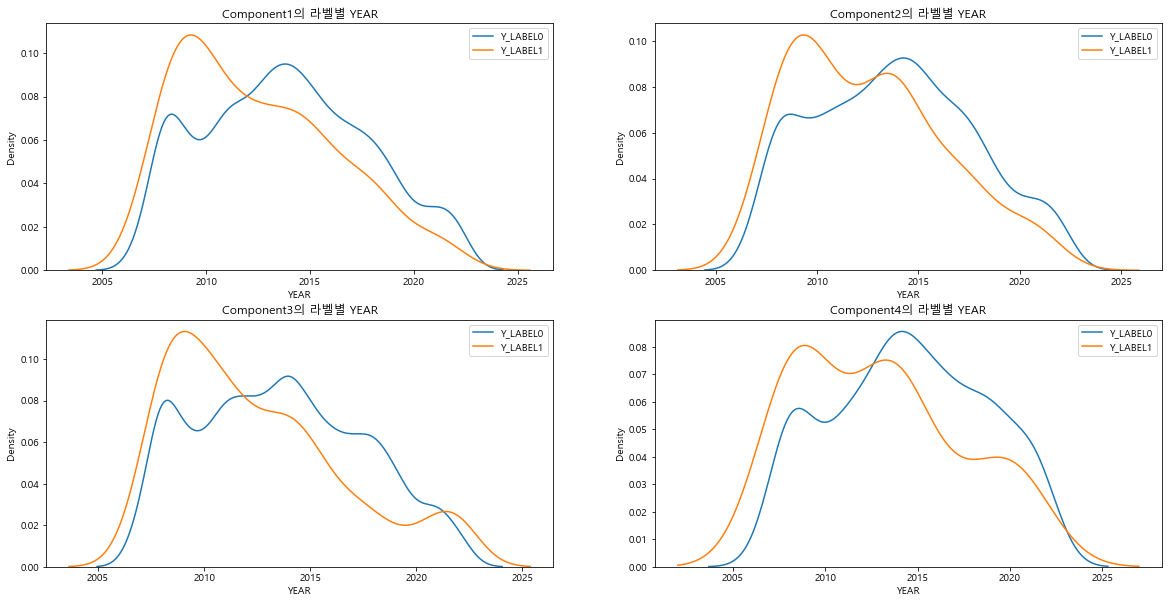

In [59]:
# Component의 Y_LABEL별 YEAR의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['YEAR'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['YEAR'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 YEAR')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['YEAR'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['YEAR'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 YEAR')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['YEAR'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['YEAR'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 YEAR')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['YEAR'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['YEAR'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 YEAR')

plt.show()

### ANONYMOUS_2

In [39]:
# Component별 ANONYMOUS_2의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['ANONYMOUS_2'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,392.906170,624.598270,200.0,200.0,200.0,391.00,9650.0
1,COMPONENT2,2316.0,383.064335,500.271599,200.0,200.0,200.0,408.25,7767.0
2,COMPONENT3,7050.0,381.766667,512.095615,200.0,200.0,200.0,414.00,9650.0
3,COMPONENT4,839.0,421.458880,615.254764,200.0,200.0,200.0,544.00,7201.0


In [40]:
# Component의 Y_LABEL별 ANONYMOUS_2 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['ANONYMOUS_2'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,398.628843,642.774178,200.0,200.0,200.0,396.00,9650.0
1,COMPONENT1,1,312.0,327.278846,348.902426,200.0,200.0,200.0,200.00,3350.0
2,COMPONENT2,0,2110.0,387.045972,494.267101,200.0,200.0,200.0,415.75,7767.0
3,COMPONENT2,1,206.0,342.281553,557.757774,200.0,200.0,200.0,375.00,7550.0
4,COMPONENT3,0,6415.0,387.318940,513.582672,200.0,200.0,200.0,434.00,9650.0
5,COMPONENT3,1,635.0,325.675591,493.722609,200.0,200.0,200.0,200.00,7900.0
6,COMPONENT4,0,789.0,430.713561,632.208512,200.0,200.0,200.0,550.00,7201.0
7,COMPONENT4,1,50.0,275.420000,151.686047,200.0,200.0,200.0,200.00,696.0


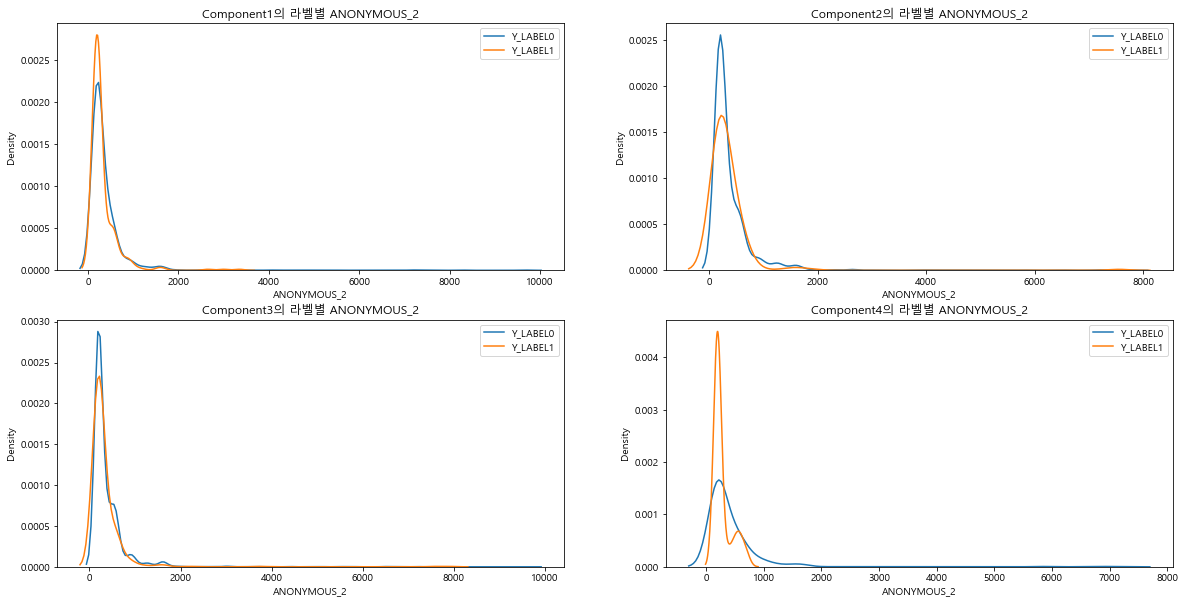

In [57]:
# Component의 Y_LABEL별 ANONYMOUS_2의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['ANONYMOUS_2'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['ANONYMOUS_2'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 ANONYMOUS_2')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['ANONYMOUS_2'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['ANONYMOUS_2'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 ANONYMOUS_2')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['ANONYMOUS_2'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['ANONYMOUS_2'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 ANONYMOUS_2')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['ANONYMOUS_2'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['ANONYMOUS_2'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 ANONYMOUS_2')

plt.show()

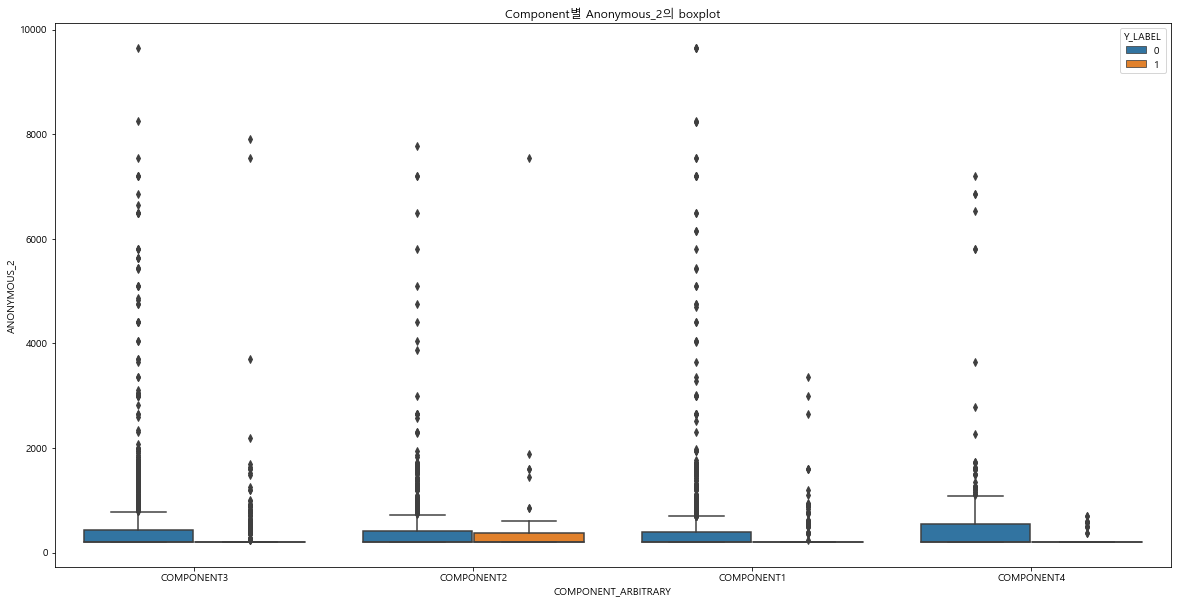

In [42]:
# Component별 ANONYMOUS_2의 boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x = 'COMPONENT_ARBITRARY', y = 'ANONYMOUS_2', hue = 'Y_LABEL', data = train)
plt.title('Component별 Anonymous_2의 boxplot')
plt.show()

### AG

In [67]:
# Component별 AG의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['AG'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,0.025193,0.170859,0.0,0.0,0.0,0.0,2.0
1,COMPONENT2,2316.0,0.024180,0.159164,0.0,0.0,0.0,0.0,2.0
2,COMPONENT3,7050.0,0.028227,0.181958,0.0,0.0,0.0,0.0,3.0
3,COMPONENT4,839.0,0.013111,0.113817,0.0,0.0,0.0,0.0,1.0


In [68]:
# Component의 Y_LABEL별 AG의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['AG'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,0.024315,0.169596,0.0,0.0,0.0,0.0,2.0
1,COMPONENT1,1,312.0,0.035256,0.184723,0.0,0.0,0.0,0.0,1.0
2,COMPONENT2,0,2110.0,0.023697,0.158249,0.0,0.0,0.0,0.0,2.0
3,COMPONENT2,1,206.0,0.029126,0.168570,0.0,0.0,0.0,0.0,1.0
4,COMPONENT3,0,6415.0,0.027280,0.178440,0.0,0.0,0.0,0.0,3.0
5,COMPONENT3,1,635.0,0.037795,0.214215,0.0,0.0,0.0,0.0,2.0
6,COMPONENT4,0,789.0,0.013942,0.117323,0.0,0.0,0.0,0.0,1.0
7,COMPONENT4,1,50.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [3]:
# AG함유량 고유값
train.AG.unique()

array([0, 1, 2, 3], dtype=int64)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


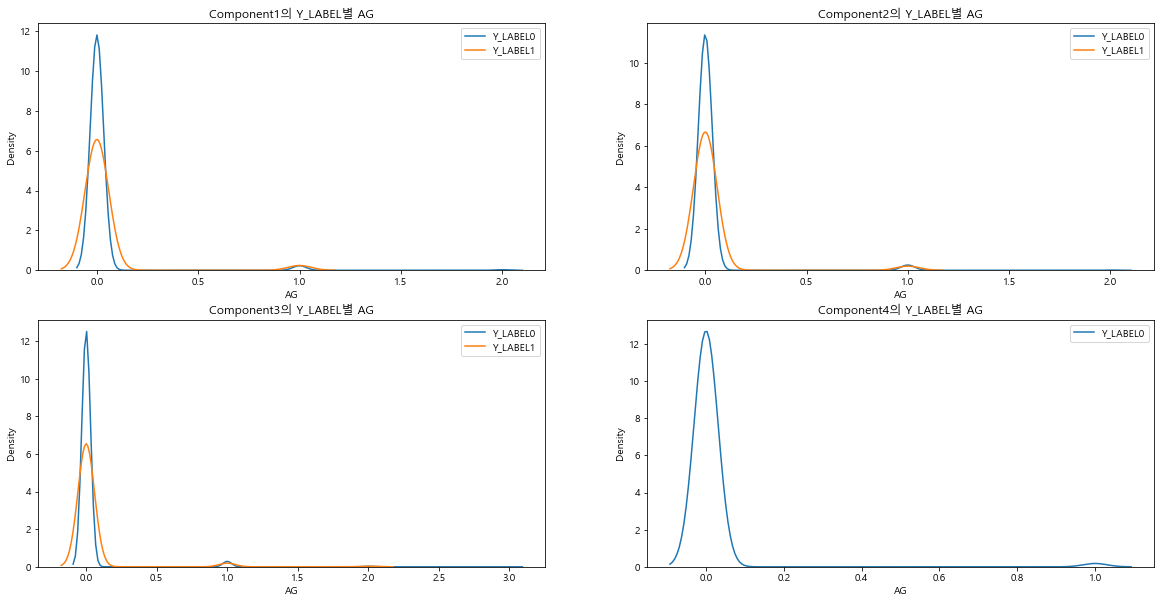

In [36]:
# Component의 Y_LABEL별 AG의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['AG'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['AG'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 AG')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['AG'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['AG'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 AG')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['AG'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['AG'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 AG')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['AG'],label = 'Y_LABEL0')
#sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['AG'],label = 'Y_LABEL1') / 해당 값이 모두 0
plt.legend()
plt.title('Component4의 Y_LABEL별 AG')

plt.show()

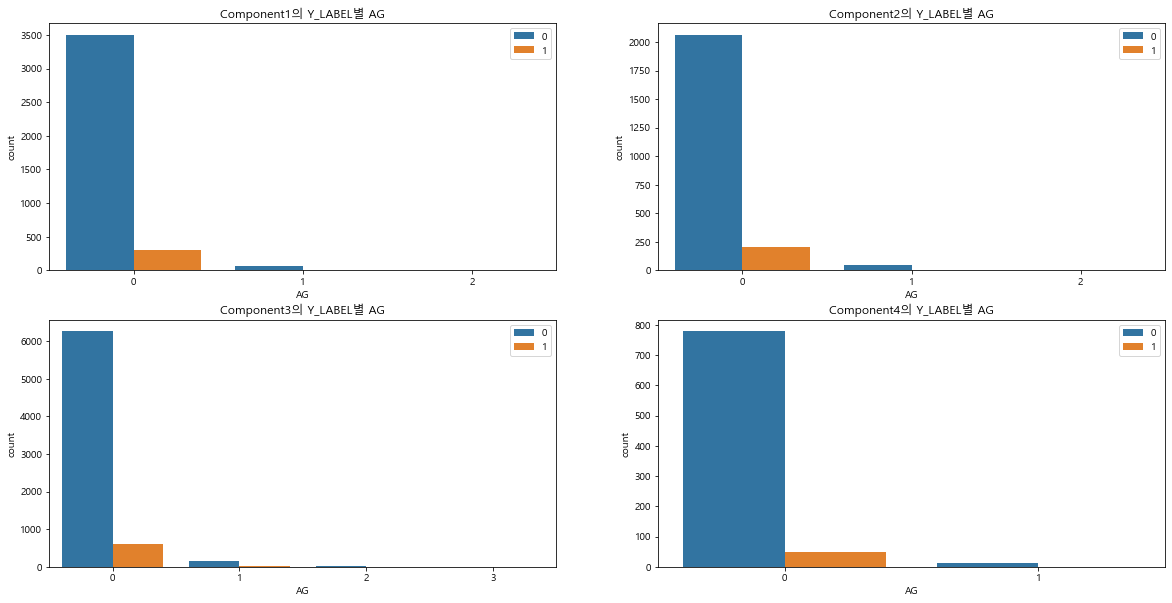

In [74]:
# Component의 Y_LABEL별 AG의 Countplot
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(data = train.query('COMPONENT_ARBITRARY == "COMPONENT1"'), x = 'AG', hue = 'Y_LABEL')
plt.title('Component1의 Y_LABEL별 AG')
plt.legend(loc = 'upper right')

plt.subplot(2,2,2)
sns.countplot(data = train.query('COMPONENT_ARBITRARY == "COMPONENT2"'), x = 'AG', hue = 'Y_LABEL')
plt.title('Component2의 Y_LABEL별 AG')
plt.legend(loc = 'upper right')

plt.subplot(2,2,3)
sns.countplot(data = train.query('COMPONENT_ARBITRARY == "COMPONENT3"'), x = 'AG', hue = 'Y_LABEL')
plt.title('Component3의 Y_LABEL별 AG')
plt.legend(loc = 'upper right')

plt.subplot(2,2,4)
sns.countplot(data = train.query('COMPONENT_ARBITRARY == "COMPONENT4"'), x = 'AG', hue = 'Y_LABEL')
plt.title('Component4의 Y_LABEL별 AG')
plt.legend(loc = 'upper right')

plt.show()

### CO

In [22]:
# Component별 CO의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['CO'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,0.014396,0.191886,0.0,0.0,0.0,0.0,6.0
1,COMPONENT2,2316.0,0.009499,0.109566,0.0,0.0,0.0,0.0,2.0
2,COMPONENT3,7050.0,0.044397,0.414502,0.0,0.0,0.0,0.0,27.0
3,COMPONENT4,839.0,0.007151,0.084313,0.0,0.0,0.0,0.0,1.0


In [23]:
# Component의 Y_LABEL별 CO의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['CO'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,0.014533,0.197301,0.0,0.0,0.0,0.0,6.0
1,COMPONENT1,1,312.0,0.012821,0.112680,0.0,0.0,0.0,0.0,1.0
2,COMPONENT2,0,2110.0,0.009953,0.112708,0.0,0.0,0.0,0.0,2.0
3,COMPONENT2,1,206.0,0.004854,0.069673,0.0,0.0,0.0,0.0,1.0
4,COMPONENT3,0,6415.0,0.042712,0.426057,0.0,0.0,0.0,0.0,27.0
5,COMPONENT3,1,635.0,0.061417,0.271125,0.0,0.0,0.0,0.0,2.0
6,COMPONENT4,0,789.0,0.007605,0.086927,0.0,0.0,0.0,0.0,1.0
7,COMPONENT4,1,50.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [26]:
# CO함유량 고유값
train.CO.unique()

array([ 0,  1,  2,  5,  4,  6,  3,  8,  7, 27], dtype=int64)

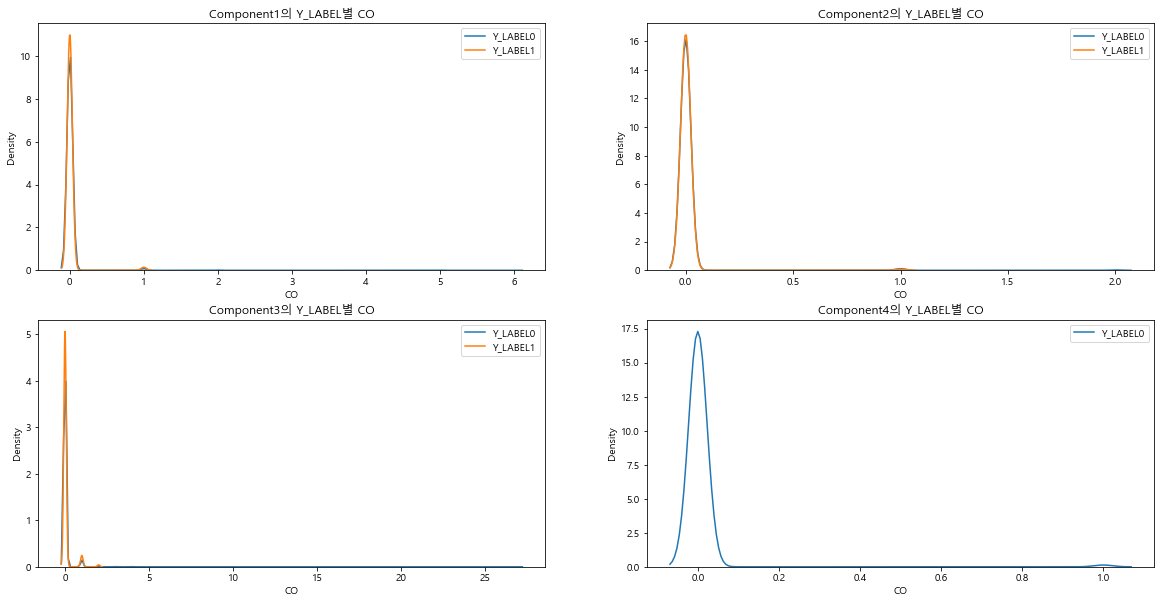

In [34]:
# Component의 Y_LABEL별 CO의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['CO'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['CO'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 CO')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['CO'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['CO'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 CO')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['CO'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['CO'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 CO')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['CO'],label = 'Y_LABEL0')
#sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['CO'],label = 'Y_LABEL1') / 해당 값이 모두 0
plt.legend()
plt.title('Component4의 Y_LABEL별 CO')

plt.show()

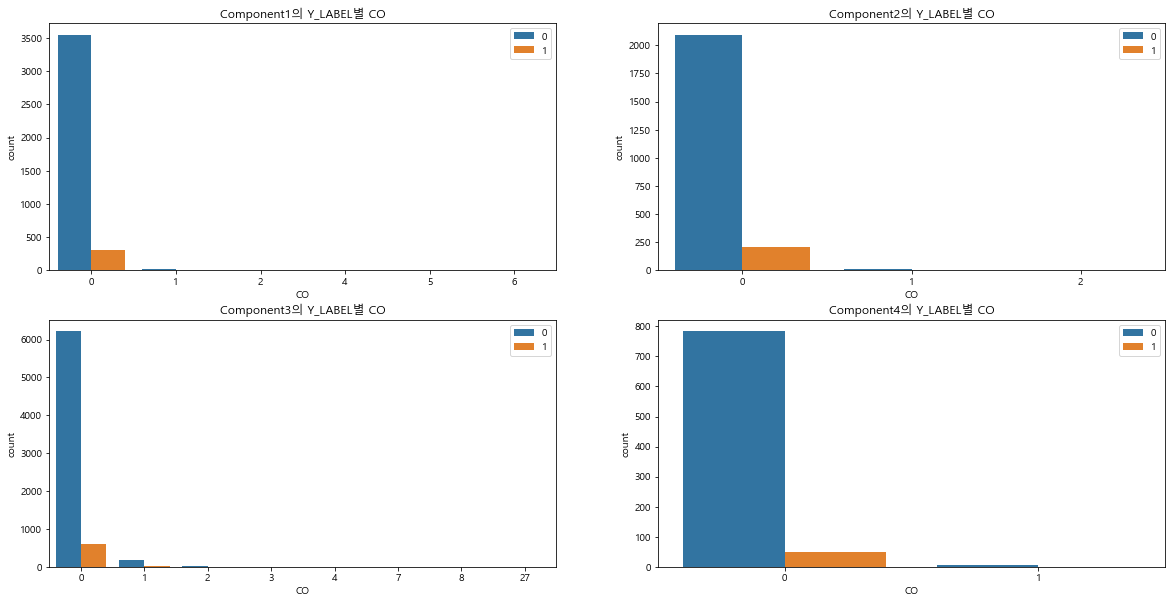

In [27]:
# Component의 Y_LABEL별 CO의 데이터 분포도
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(data = train.query('COMPONENT_ARBITRARY == "COMPONENT1"'), x = 'CO', hue = 'Y_LABEL')
plt.title('Component1의 Y_LABEL별 CO')
plt.legend(loc = 'upper right')

plt.subplot(2,2,2)
sns.countplot(data = train.query('COMPONENT_ARBITRARY == "COMPONENT2"'), x = 'CO', hue = 'Y_LABEL')
plt.title('Component2의 Y_LABEL별 CO')
plt.legend(loc = 'upper right')

plt.subplot(2,2,3)
sns.countplot(data = train.query('COMPONENT_ARBITRARY == "COMPONENT3"'), x = 'CO', hue = 'Y_LABEL')
plt.title('Component3의 Y_LABEL별 CO')
plt.legend(loc = 'upper right')

plt.subplot(2,2,4)
sns.countplot(data = train.query('COMPONENT_ARBITRARY == "COMPONENT4"'), x = 'CO', hue = 'Y_LABEL')
plt.title('Component4의 Y_LABEL별 CO')
plt.legend(loc = 'upper right')

plt.show()

### CU

In [38]:
# Component별 CU의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['CU'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,9.929563,26.260551,0.0,2.0,3.0,8.00,786.0
1,COMPONENT2,2316.0,56.677029,85.017961,0.0,5.0,12.0,96.25,873.0
2,COMPONENT3,7050.0,32.252057,159.454779,0.0,1.0,4.0,15.00,5701.0
3,COMPONENT4,839.0,107.109654,182.141582,0.0,1.0,6.0,158.50,1344.0


In [39]:
# Component의 Y_LABEL별 CU의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['CU'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,9.778647,23.615790,0.0,2.00,3.0,8.00,531.0
1,COMPONENT1,1,312.0,11.660256,46.965472,0.0,2.00,3.0,9.00,786.0
2,COMPONENT2,0,2110.0,55.124171,82.297548,0.0,5.00,12.0,92.00,739.0
3,COMPONENT2,1,206.0,72.582524,108.013642,0.0,5.00,14.5,125.25,873.0
4,COMPONENT3,0,6415.0,30.999688,151.136465,0.0,1.00,4.0,15.00,5701.0
5,COMPONENT3,1,635.0,44.903937,226.775766,0.0,1.00,5.0,19.00,4134.0
6,COMPONENT4,0,789.0,104.827630,180.913343,0.0,1.00,5.0,147.00,1344.0
7,COMPONENT4,1,50.0,143.120000,199.039289,0.0,2.25,23.0,313.75,858.0


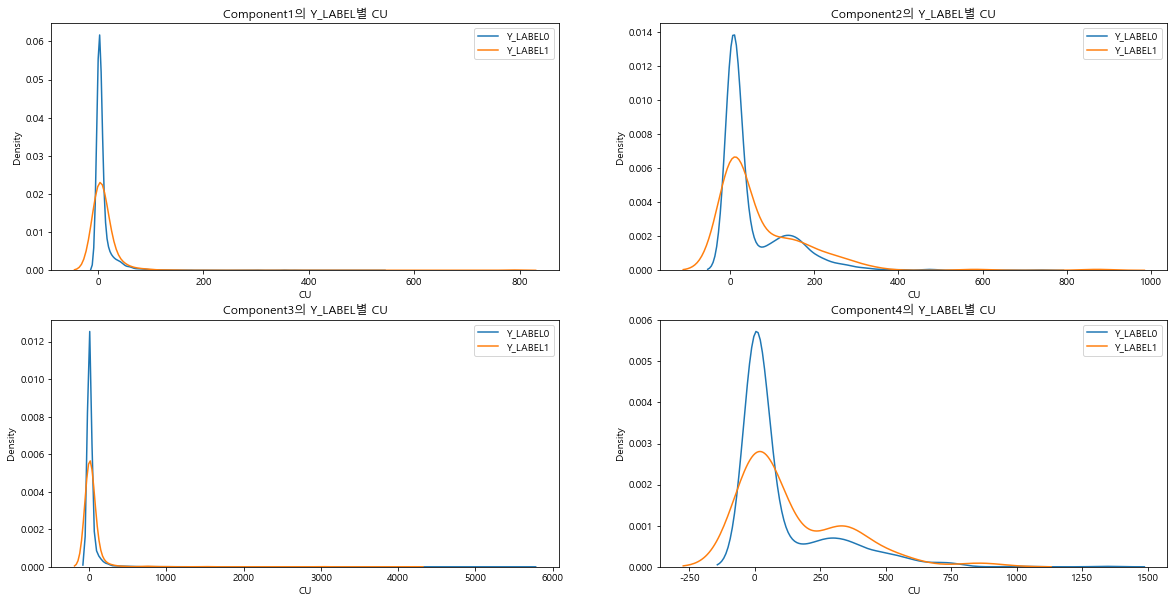

In [42]:
# Component의 Y_LABEL별 CU의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['CU'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['CU'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 CU')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['CU'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['CU'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 CU')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['CU'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['CU'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 CU')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['CU'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['CU'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 CU')

plt.show()

### FE

In [44]:
# Component별 FE의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['FE'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,27.057069,34.615358,1.0,12.0,20.0,33.0,1085.0
1,COMPONENT2,2316.0,18.890328,38.551204,0.0,3.0,6.0,14.0,425.0
2,COMPONENT3,7050.0,332.500426,720.828270,0.0,65.0,134.0,308.0,31706.0
3,COMPONENT4,839.0,21.651967,19.573690,2.0,12.0,16.0,24.0,252.0


In [45]:
# Component의 Y_LABEL별 FE의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['FE'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,26.812186,34.694182,1.0,12.00,20.0,33.00,1085.0
1,COMPONENT1,1,312.0,29.865385,33.624958,3.0,13.00,21.0,36.25,282.0
2,COMPONENT2,0,2110.0,18.053555,36.824169,0.0,3.00,6.0,14.00,425.0
3,COMPONENT2,1,206.0,27.461165,52.456123,0.0,3.00,5.0,16.00,332.0
4,COMPONENT3,0,6415.0,318.790803,698.969312,0.0,63.00,132.0,298.00,31706.0
5,COMPONENT3,1,635.0,471.000000,901.817144,7.0,83.00,167.0,430.00,10624.0
6,COMPONENT4,0,789.0,21.692015,19.709121,2.0,12.00,16.0,24.00,252.0
7,COMPONENT4,1,50.0,21.020000,17.463069,6.0,12.25,16.5,23.00,101.0


In [46]:
# train의 FE 고유값
train.FE.unique()

array([ 888,    2,    4, ..., 3240, 1666, 1791], dtype=int64)

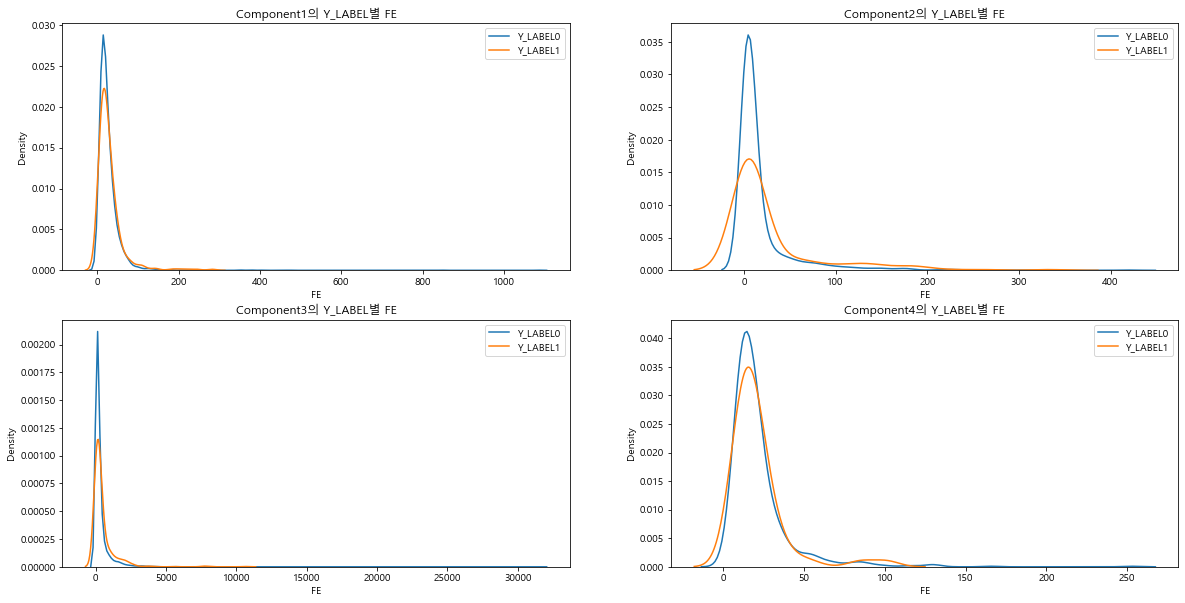

In [47]:
# Component의 Y_LABEL별 FE의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['FE'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['FE'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 FE')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['FE'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['FE'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 FE')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['FE'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['FE'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 FE')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['FE'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['FE'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 FE')

plt.show()

### H20

In [52]:
# Component별 H2O의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['H2O'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,0.002699,0.070559,0.0,0.0,0.0,0.0,3.9
1,COMPONENT2,2316.0,0.003282,0.045795,0.0,0.0,0.0,0.0,1.4
2,COMPONENT3,7050.0,0.064525,1.141807,0.0,0.0,0.0,0.0,52.7
3,COMPONENT4,839.0,0.001549,0.020378,0.0,0.0,0.0,0.0,0.4


In [53]:
# Component의 Y_LABEL별 H2O의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['H2O'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,0.002459,0.069662,0.0,0.0,0.0,0.0,3.9
1,COMPONENT1,1,312.0,0.005449,0.080207,0.0,0.0,0.0,0.0,1.4
2,COMPONENT2,0,2110.0,0.002986,0.045317,0.0,0.0,0.0,0.0,1.4
3,COMPONENT2,1,206.0,0.006311,0.050451,0.0,0.0,0.0,0.0,0.6
4,COMPONENT3,0,6415.0,0.067186,1.194839,0.0,0.0,0.0,0.0,52.7
5,COMPONENT3,1,635.0,0.037638,0.226586,0.0,0.0,0.0,0.0,3.4
6,COMPONENT4,0,789.0,0.001648,0.021011,0.0,0.0,0.0,0.0,0.4
7,COMPONENT4,1,50.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [54]:
# train의 H2O 고유값
train.H2O.unique()

array([ 0. ,  0.1,  0.2,  0.3,  2.3,  0.4,  0.5,  1. , 14.3,  0.9,  2.6,
        4.2,  1.2,  1.8,  0.6,  7.7,  0.8,  2.5,  1.4,  1.7,  0.7,  2. ,
        1.1,  4.6,  3.3, 52.7, 38. ,  2.7, 26.7, 11.4, 12.1,  3.1,  1.3,
       22.8,  9.8,  5.2,  2.2,  4.9,  3.4,  3.9,  5.5,  6.1, 16.1, 49.1,
        1.5,  3.6,  7. ])

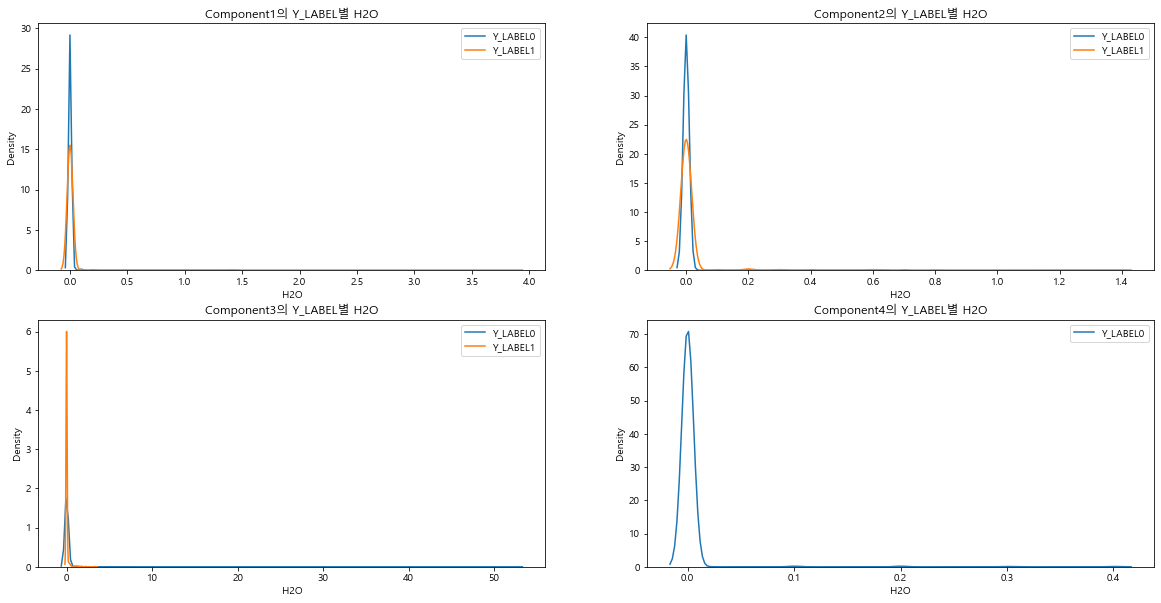

In [57]:
# Component의 Y_LABEL별 H2O의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['H2O'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['H2O'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 H2O')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['H2O'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['H2O'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 H2O')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['H2O'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['H2O'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 H2O')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['H2O'],label = 'Y_LABEL0')
#sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['H2O'],label = 'Y_LABEL1') / 해당 값이 모두 0
plt.legend()
plt.title('Component4의 Y_LABEL별 H2O')

plt.show()

### MN

In [58]:
# Component별 MN의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['MN'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,0.514910,0.942911,0.0,0.0,0.0,1.0,20.0
1,COMPONENT2,2316.0,0.155872,0.477000,0.0,0.0,0.0,0.0,5.0
2,COMPONENT3,7050.0,5.137163,15.339680,0.0,0.0,2.0,5.0,877.0
3,COMPONENT4,839.0,0.852205,2.596048,0.0,0.0,0.0,1.0,30.0


In [59]:
# Component의 Y_LABEL별 MN의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['MN'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,0.507267,0.932486,0.0,0.0,0.0,1.0,20.0
1,COMPONENT1,1,312.0,0.602564,1.052814,0.0,0.0,0.0,1.0,13.0
2,COMPONENT2,0,2110.0,0.147867,0.466957,0.0,0.0,0.0,0.0,5.0
3,COMPONENT2,1,206.0,0.237864,0.564583,0.0,0.0,0.0,0.0,3.0
4,COMPONENT3,0,6415.0,4.997194,15.543846,0.0,0.0,2.0,5.0,877.0
5,COMPONENT3,1,635.0,6.551181,13.026368,0.0,1.0,2.0,6.0,124.0
6,COMPONENT4,0,789.0,0.879594,2.661428,0.0,0.0,0.0,1.0,30.0
7,COMPONENT4,1,50.0,0.420000,1.070762,0.0,0.0,0.0,1.0,7.0


In [60]:
# train의 MN 고유값
train.MN.unique()

array([ 16,   0,   1,  42,   2,   5,  22,  12,   3,   6,   4,  15,   8,
         7,  11,  19,  71,   9,  14,  72,  45,  44,  33,  10,  41,  13,
        40,  26,  23,  65,  24,  48,  20,  51,  29,  30,  46,  31,  21,
        55,  63,  58,  35,  17,  52,  78,  89,  50,  39,  75,  38,  70,
        25,  18,  32,  27,  43,  36,  57,  81, 111,  62, 112,  28,  67,
        60,  34,  76,  83, 138,  87,  99, 877, 156,  92,  79, 102,  96,
        59, 326,  95,  47,  56,  82,  49, 126,  37, 113, 141,  64,  53,
       120,  91,  73,  93, 110, 124,  77,  54,  61], dtype=int64)

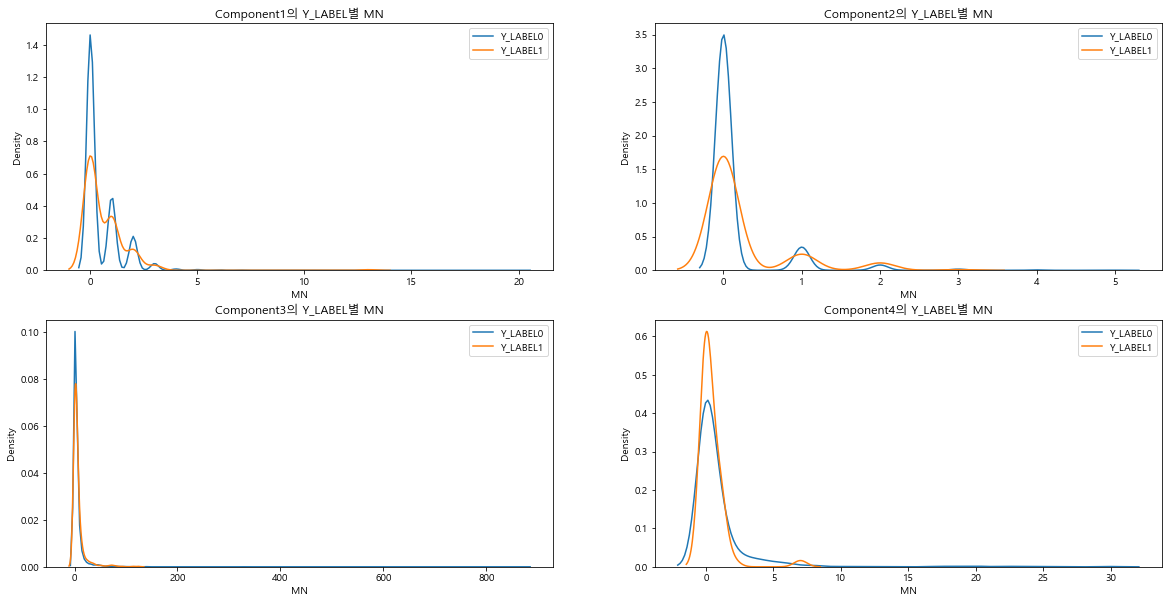

In [61]:
# Component의 Y_LABEL별 MN의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['MN'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['MN'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 MN')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['MN'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['MN'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 MN')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['MN'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['MN'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 MN')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['MN'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['MN'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 MN')

plt.show()

### MO

In [62]:
# Component별 MO의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['MO'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,69.364267,90.586386,0.0,2.0,21.5,137.0,348.0
1,COMPONENT2,2316.0,0.652418,3.319372,0.0,0.0,0.0,0.0,87.0
2,COMPONENT3,7050.0,3.415745,13.059607,0.0,0.0,0.0,3.0,419.0
3,COMPONENT4,839.0,50.958284,72.894221,0.0,1.0,10.0,84.0,315.0


In [63]:
# Component의 Y_LABEL별 MO의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['MO'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,68.395193,90.504036,0.0,1.0,19.0,129.00,348.0
1,COMPONENT1,1,312.0,80.477564,90.934552,0.0,2.0,39.0,168.25,280.0
2,COMPONENT2,0,2110.0,0.658768,3.371731,0.0,0.0,0.0,0.00,87.0
3,COMPONENT2,1,206.0,0.587379,2.731860,0.0,0.0,0.0,0.00,31.0
4,COMPONENT3,0,6415.0,3.425877,13.319984,0.0,0.0,0.0,3.00,419.0
5,COMPONENT3,1,635.0,3.313386,10.065921,0.0,0.0,1.0,3.00,190.0
6,COMPONENT4,0,789.0,51.889734,73.687220,0.0,1.0,11.0,85.00,315.0
7,COMPONENT4,1,50.0,36.260000,57.604496,0.0,2.0,5.0,46.25,210.0


In [64]:
# train의 MO 고유값
train.MO.unique()

array([  1,   0,  11,   3,  56,   4, 197,   2, 214,  24, 150, 231, 223,
       256,  55, 193,  29, 186, 136, 189,   5,  14,  12,  13,  65, 206,
       176,   9, 271,  39,   7,  38, 246,  42, 130, 181,  18,  10,   6,
        36,  15,  43, 205,  16,  99,  37, 102, 254, 164, 202, 134, 168,
       234,  48,  68,  94, 235,  77,  31, 100, 198, 239, 110, 173, 232,
        63,  45, 199,  41, 172,  44, 304, 253,  25, 215, 153, 159, 121,
       165, 255, 216, 296, 249,  23,  22,  83,  28, 242,  74,  34, 262,
       175,   8, 188,  54, 133, 124, 222, 190, 274,  92,  52,  17,  61,
       208,  50,  19, 166, 241, 209, 192,  27, 140, 135, 217, 258, 185,
        49, 237, 137,  32,  20, 220, 247, 196, 131, 224,  46, 250, 158,
       114,  33,  21,  26,  97, 210, 226, 161, 252, 204, 233,  85, 117,
       170, 163, 178,  93, 244,  62, 144,  40, 142,  35, 263,  53,  91,
       236, 229, 125, 183, 207,  47,  59, 218, 112, 180, 221, 312, 101,
       275, 225, 261,  87, 127,  51, 162, 419, 111, 272, 138, 26

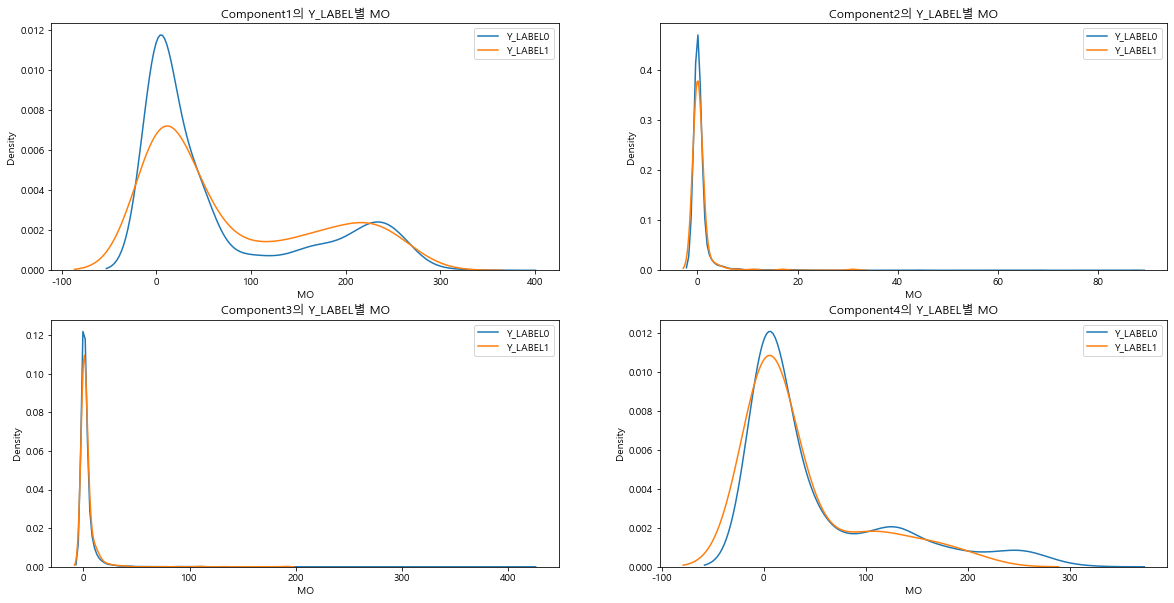

In [65]:
# Component의 Y_LABEL별 MO의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['MO'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['MO'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 MO')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['MO'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['MO'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 MO')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['MO'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['MO'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 MO')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['MO'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['MO'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 MO')

plt.show()

### NI

In [66]:
# Component별 NI의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['NI'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,0.152185,0.850621,0.0,0.0,0.0,0.0,33.0
1,COMPONENT2,2316.0,0.027634,0.225991,0.0,0.0,0.0,0.0,6.0
2,COMPONENT3,7050.0,1.362553,5.267794,0.0,0.0,0.0,1.0,176.0
3,COMPONENT4,839.0,0.034565,0.189200,0.0,0.0,0.0,0.0,2.0


In [67]:
# Component의 Y_LABEL별 NI의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['NI'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,0.140861,0.774020,0.0,0.0,0.0,0.0,33.0
1,COMPONENT1,1,312.0,0.282051,1.462478,0.0,0.0,0.0,0.0,23.0
2,COMPONENT2,0,2110.0,0.028436,0.232795,0.0,0.0,0.0,0.0,6.0
3,COMPONENT2,1,206.0,0.019417,0.138323,0.0,0.0,0.0,0.0,1.0
4,COMPONENT3,0,6415.0,1.266251,4.723328,0.0,0.0,0.0,1.0,141.0
5,COMPONENT3,1,635.0,2.335433,9.043494,0.0,0.0,0.0,2.0,176.0
6,COMPONENT4,0,789.0,0.030418,0.179077,0.0,0.0,0.0,0.0,2.0
7,COMPONENT4,1,50.0,0.100000,0.303046,0.0,0.0,0.0,0.0,1.0


In [68]:
# train의 NI 고유값
train.NI.unique()

array([  6,   0,   4,   1,   3,   2,   5,  11,   7,  32,  15,   9,  51,
        14,  45,   8,  30,  18,  33,  12,  22,  23,  13,  17,  43,  50,
        20,  29,  25,  42,  16,  21,  24,  54,  10,  38,  27,  28,  84,
        19,  88,  36, 141,  58,  55,  26,  34, 176, 101,  49,  61,  86,
        47,  35, 121,  31,  40], dtype=int64)

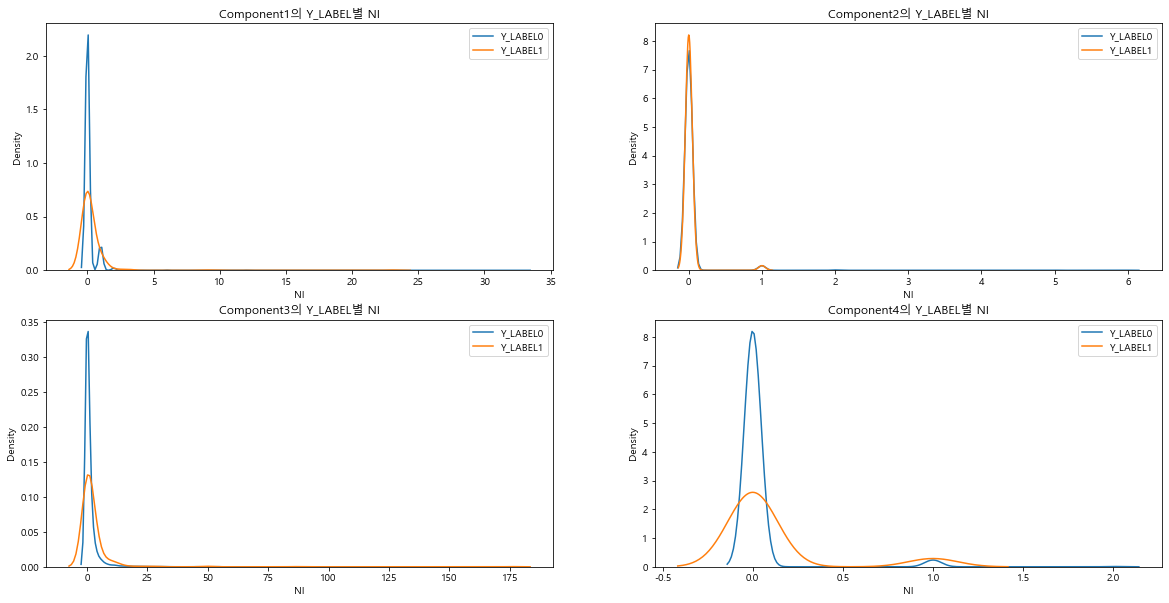

In [69]:
# Component의 Y_LABEL별 NI의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['NI'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['NI'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 NI')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['NI'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['NI'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 NI')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['NI'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['NI'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 NI')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['NI'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['NI'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 NI')

plt.show()

### PQINDEX

In [39]:
# Component별 PQINDEX의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['PQINDEX'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,20.422622,183.759285,0.0,7.0,12.0,17.0,10176.0
1,COMPONENT2,2316.0,27.230570,312.354979,0.0,7.0,12.0,20.0,14592.0
2,COMPONENT3,7050.0,807.300567,2076.250905,1.0,67.0,176.0,555.0,56761.0
3,COMPONENT4,839.0,21.091776,41.917665,0.0,9.0,15.0,22.0,695.0


In [83]:
# Component의 Y_LABEL별 PQINDEX의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['PQINDEX'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,20.852152,191.536831,0.0,7.00,12.0,17.00,10176.0
1,COMPONENT1,1,312.0,15.496795,16.665616,1.0,8.00,12.0,17.00,160.0
2,COMPONENT2,0,2110.0,28.187678,327.196468,0.0,7.00,12.0,19.00,14592.0
3,COMPONENT2,1,206.0,17.427184,16.875788,0.0,8.00,13.0,21.00,143.0
4,COMPONENT3,0,6415.0,783.619330,1968.782788,1.0,66.00,172.0,532.50,28195.0
5,COMPONENT3,1,635.0,1046.537008,2941.509702,2.0,87.00,222.0,810.00,56761.0
6,COMPONENT4,0,789.0,21.438530,43.162782,0.0,9.00,15.0,22.00,695.0
7,COMPONENT4,1,50.0,15.620000,7.540070,5.0,11.25,15.0,18.75,50.0


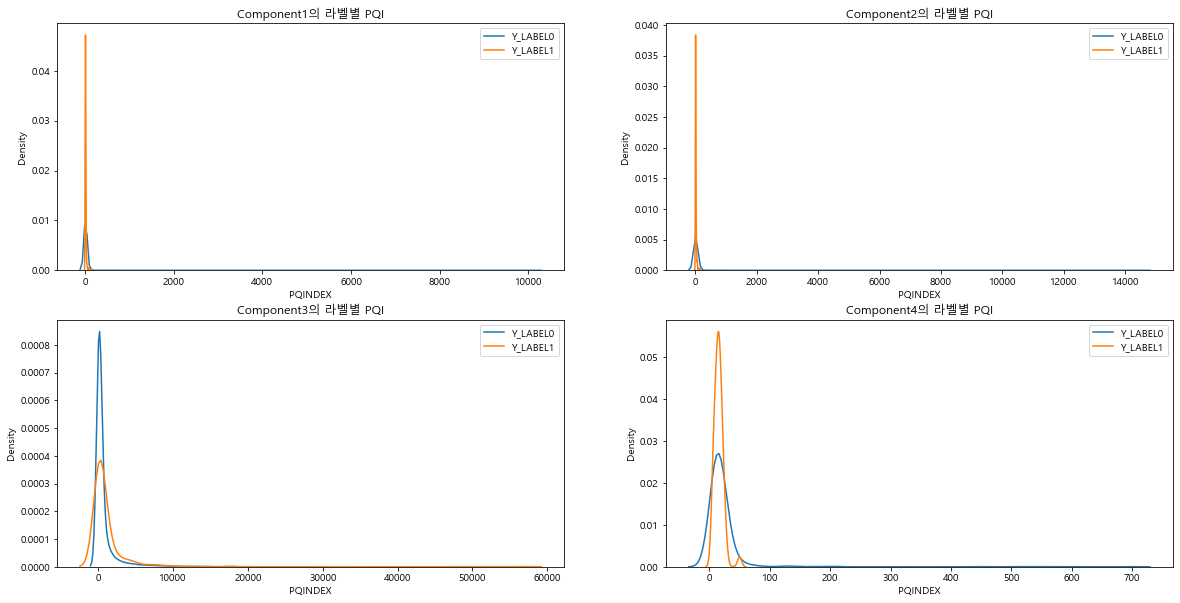

In [63]:
# Component의 Y_LABEL별 PQINDEX의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['PQINDEX'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['PQINDEX'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 PQINDEX')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['PQINDEX'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['PQINDEX'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 PQINDEX')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['PQINDEX'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['PQINDEX'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 PQINDEX')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['PQINDEX'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['PQINDEX'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 PQINDEX')

plt.show()

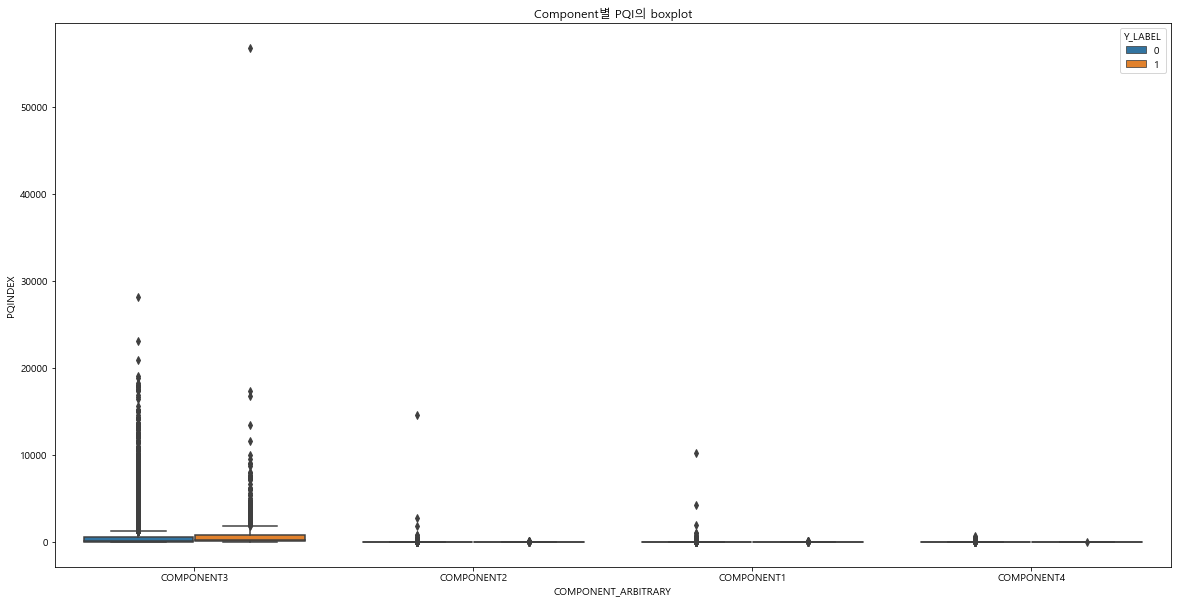

In [161]:
# Compoent별 PQINDEX의 boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x = 'COMPONENT_ARBITRARY', y = 'PQINDEX', hue = 'Y_LABEL', data = train)
plt.title('Component별 PQI의 boxplot')
plt.show()

### TI

In [3]:
# Component별 TI의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['TI'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,0.055013,0.564718,0.0,0.0,0.0,0.0,27.0
1,COMPONENT2,2316.0,0.032815,0.278461,0.0,0.0,0.0,0.0,5.0
2,COMPONENT3,7050.0,1.372908,9.697325,0.0,0.0,0.0,0.0,403.0
3,COMPONENT4,839.0,0.010727,0.114067,0.0,0.0,0.0,0.0,2.0


In [4]:
# Component의 Y_LABEL별 TI의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['TI'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,0.056177,0.585375,0.0,0.0,0.0,0.0,27.0
1,COMPONENT1,1,312.0,0.041667,0.215615,0.0,0.0,0.0,0.0,2.0
2,COMPONENT2,0,2110.0,0.033649,0.281069,0.0,0.0,0.0,0.0,5.0
3,COMPONENT2,1,206.0,0.024272,0.250644,0.0,0.0,0.0,0.0,3.0
4,COMPONENT3,0,6415.0,1.270304,9.710282,0.0,0.0,0.0,0.0,403.0
5,COMPONENT3,1,635.0,2.409449,9.511038,0.0,0.0,0.0,0.0,113.0
6,COMPONENT4,0,789.0,0.011407,0.117597,0.0,0.0,0.0,0.0,2.0
7,COMPONENT4,1,50.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
# train의 TI 고유값
train.TI.unique()

array([  5,   0,   6,   2,   1,   4,   3,   7,  46,  24,   9,  35,  19,
        15,   8,  26, 153,  22,  11,  21,  32,  56,  27,  16,  36, 104,
        12,  33,  13,  10,  30,  20,  28,  14,  64,  59,  45,  18, 403,
        17,  44,  43,  23,  25, 137,  29,  41,  31, 150,  95,  68, 151,
        77, 126,  69,  34, 140,  49,  93,  37,  63,  38,  60, 113,  51,
        57,  97,  39,  67,  47,  71], dtype=int64)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


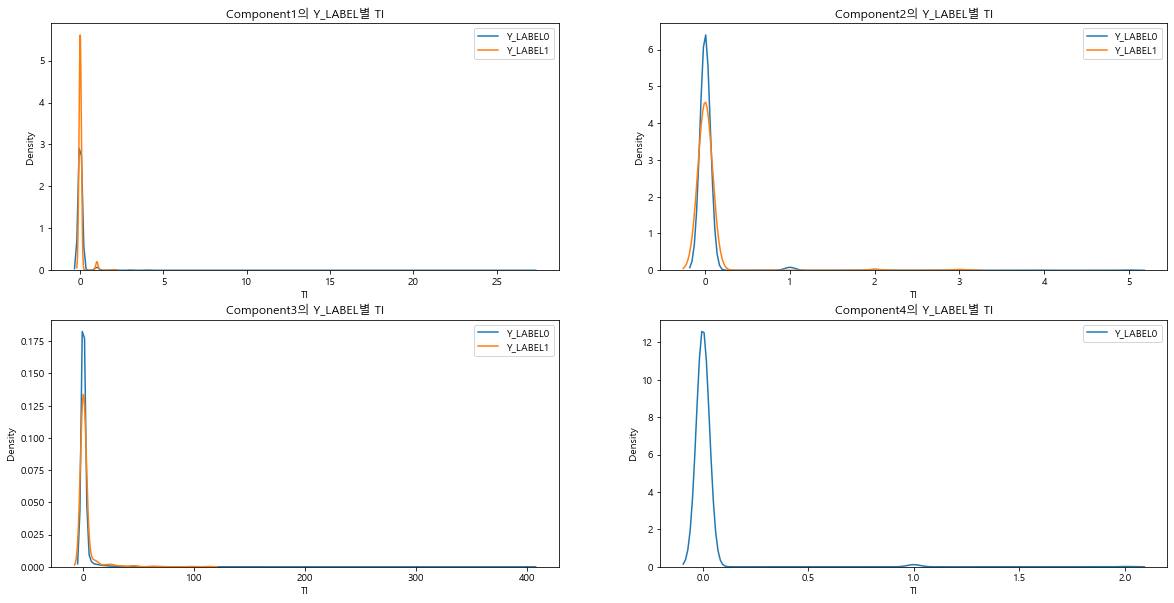

In [6]:
# Component의 Y_LABEL별 TI의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['TI'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['TI'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 TI')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['TI'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['TI'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 TI')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['TI'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['TI'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 TI')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['TI'],label = 'Y_LABEL0')
#sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['TI'],label = 'Y_LABEL1') / 해당 값이 모두 0
plt.legend()
plt.title('Component4의 Y_LABEL별 TI')

plt.show()

### V

In [70]:
# Component별 V의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['V'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,0.024422,0.157670,0.0,0.0,0.0,0.0,2.0
1,COMPONENT2,2316.0,0.010794,0.132642,0.0,0.0,0.0,0.0,2.0
2,COMPONENT3,7050.0,0.082837,0.653420,0.0,0.0,0.0,0.0,17.0
3,COMPONENT4,839.0,0.011919,0.168812,0.0,0.0,0.0,0.0,3.0


In [71]:
# Component의 Y_LABEL별 V의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['V'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,0.023756,0.155938,0.0,0.0,0.0,0.0,2.0
1,COMPONENT1,1,312.0,0.032051,0.176419,0.0,0.0,0.0,0.0,1.0
2,COMPONENT2,0,2110.0,0.010900,0.132004,0.0,0.0,0.0,0.0,2.0
3,COMPONENT2,1,206.0,0.009709,0.139347,0.0,0.0,0.0,0.0,2.0
4,COMPONENT3,0,6415.0,0.077319,0.633201,0.0,0.0,0.0,0.0,16.0
5,COMPONENT3,1,635.0,0.138583,0.829089,0.0,0.0,0.0,0.0,17.0
6,COMPONENT4,0,789.0,0.012674,0.174057,0.0,0.0,0.0,0.0,3.0
7,COMPONENT4,1,50.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [72]:
# train의 V 고유값
train.V.unique()

array([ 0,  2,  1, 13,  3,  4,  6, 15,  5, 10, 14, 16,  7, 17, 12],
      dtype=int64)

In [74]:
train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['V'].unique()

array([0], dtype=int64)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


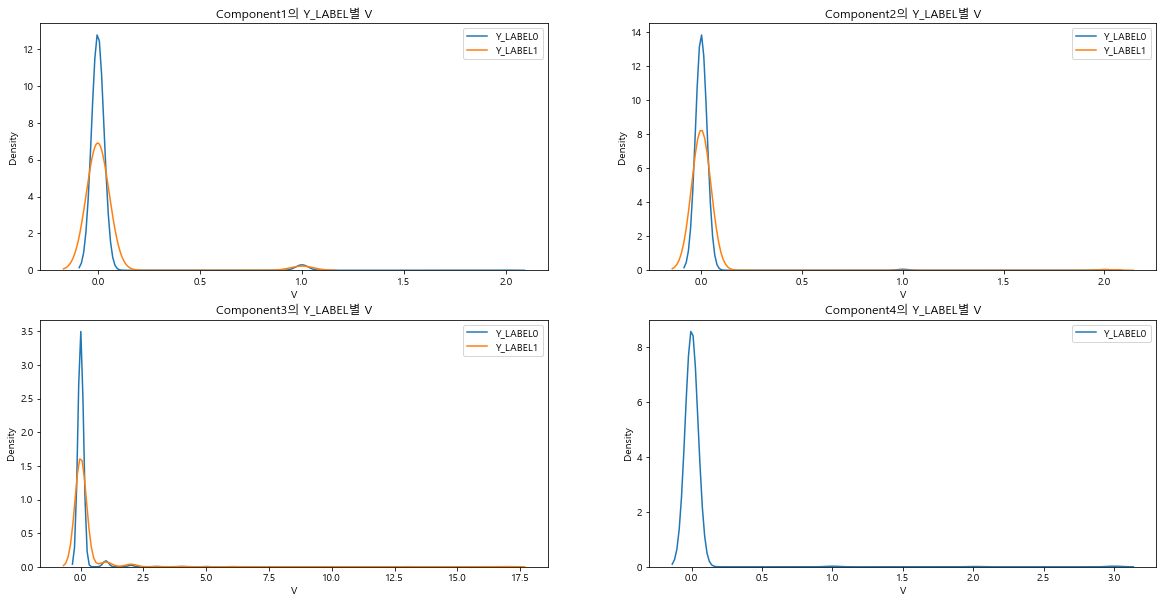

In [73]:
# Component의 Y_LABEL별 V의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['V'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['V'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 V')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['V'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['V'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 V')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['V'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['V'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 V')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['V'],label = 'Y_LABEL0')
#sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['V'],label = 'Y_LABEL1') / 해당 값이 모두 0
plt.legend()
plt.title('Component4의 Y_LABEL별 V')

plt.show()

### V40

In [75]:
# Component별 V40의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['V40'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,102.678103,13.029131,22.80,94.00,100.7,111.800,202.6
1,COMPONENT2,2316.0,52.720695,11.331963,2.90,44.70,47.6,60.825,193.2
2,COMPONENT3,7050.0,136.411370,52.573037,36.16,126.40,137.0,147.675,2840.5
3,COMPONENT4,839.0,69.310012,13.027442,28.10,64.35,70.5,76.000,203.3


In [76]:
# Component의 Y_LABEL별 V40의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['V40'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,102.574080,12.948358,22.80,94.00,100.50,111.600,202.6
1,COMPONENT1,1,312.0,103.871026,13.888327,55.70,94.20,102.20,113.525,162.9
2,COMPONENT2,0,2110.0,52.670915,11.141608,2.90,44.70,47.40,60.900,193.2
3,COMPONENT2,1,206.0,53.230583,13.143960,35.10,45.00,49.40,60.025,189.8
4,COMPONENT3,0,6415.0,136.030756,53.605424,36.16,126.30,136.80,147.350,2840.5
5,COMPONENT3,1,635.0,140.256472,40.534473,45.30,129.40,139.30,150.300,394.3
6,COMPONENT4,0,789.0,69.075285,12.244239,28.10,64.50,70.50,75.900,143.8
7,COMPONENT4,1,50.0,73.014000,21.831002,52.00,60.55,70.95,77.750,203.3


In [77]:
# train의 V40 고유값
train.V40.unique()

array([154.  ,  44.  ,  72.6 , ..., 292.3 , 175.9 , 147.05])

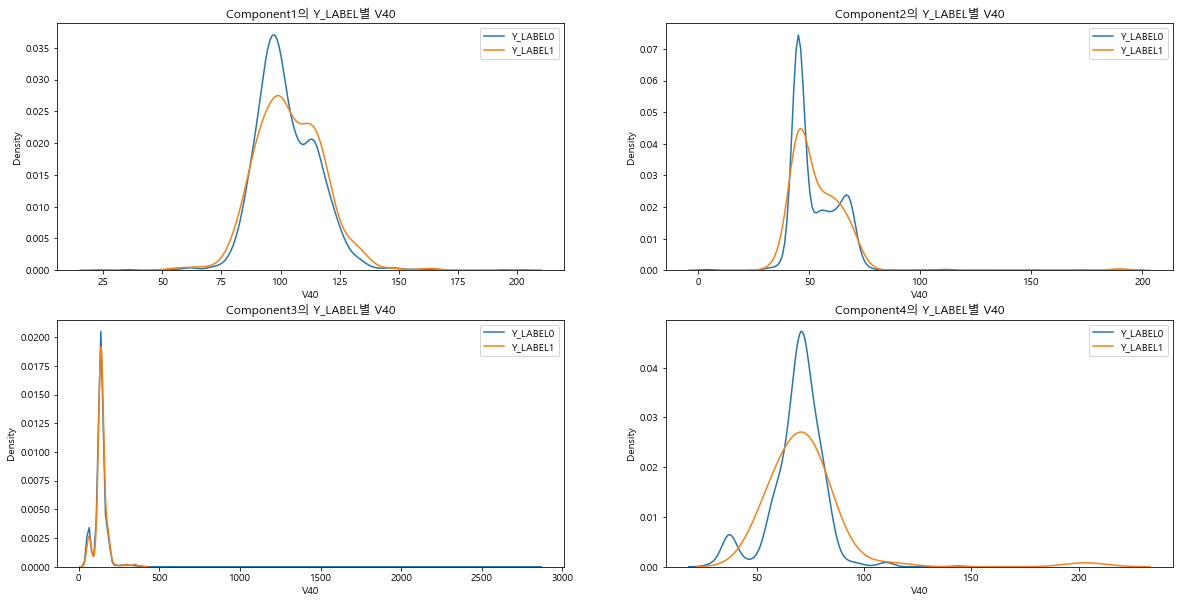

In [78]:
# Component의 Y_LABEL별 V40의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['V40'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['V40'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 V40')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['V40'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['V40'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 V40')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['V40'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['V40'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 V40')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['V40'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['V40'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 V40')

plt.show()

### ZN

In [79]:
# Component별 ZN의 데이터 분포
train.groupby('COMPONENT_ARBITRARY')['ZN'].describe().reset_index()

,COMPONENT_ARBITRARY,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,3890.0,1161.010283,177.401876,37.0,1048.0,1150.0,1283.00,2132.0
1,COMPONENT2,2316.0,505.785838,199.982478,0.0,357.0,542.0,656.00,1438.0
2,COMPONENT3,7050.0,241.379574,438.048928,0.0,19.0,38.0,119.75,1708.0
3,COMPONENT4,839.0,1081.669845,295.375097,6.0,1027.0,1129.0,1228.50,2088.0


In [80]:
# Component의 Y_LABEL별 ZN의 데이터 분포
train.groupby(['COMPONENT_ARBITRARY','Y_LABEL'])['ZN'].describe().reset_index()

,COMPONENT_ARBITRARY,Y_LABEL,count,mean,std,min,25%,50%,75%,max
0,COMPONENT1,0,3578.0,1159.282840,173.461922,40.0,1046.00,1149.0,1280.75,1795.0
1,COMPONENT1,1,312.0,1180.820513,216.896881,37.0,1063.50,1169.5,1295.25,2132.0
2,COMPONENT2,0,2110.0,504.977725,202.018653,0.0,354.00,543.0,658.00,1438.0
3,COMPONENT2,1,206.0,514.063107,178.021021,7.0,389.75,540.5,639.00,1201.0
4,COMPONENT3,0,6415.0,246.204521,443.268725,0.0,19.00,38.0,120.00,1708.0
5,COMPONENT3,1,635.0,192.636220,378.198855,0.0,20.00,42.0,113.50,1533.0
6,COMPONENT4,0,789.0,1082.012674,299.568628,6.0,1027.00,1131.0,1229.00,2088.0
7,COMPONENT4,1,50.0,1076.260000,221.072230,11.0,1007.25,1100.5,1210.50,1445.0


In [81]:
# train의 ZN 고유값
train.ZN.unique()

array([  75,  652,  412, ...,  222, 1619,  780], dtype=int64)

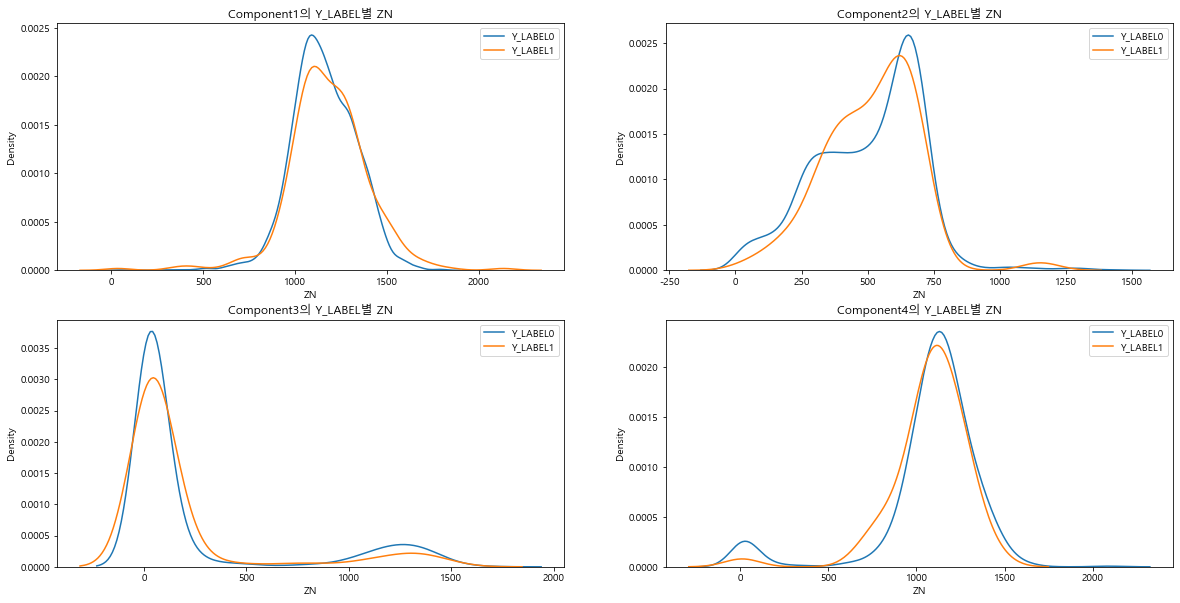

In [82]:
# Component의 Y_LABEL별 ZN의 데이터 분포도
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 0')['ZN'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT1" & Y_LABEL == 1')['ZN'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component1의 Y_LABEL별 ZN')

plt.subplot(2,2,2)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 0')['ZN'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT2" & Y_LABEL == 1')['ZN'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component2의 Y_LABEL별 ZN')

plt.subplot(2,2,3)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 0')['ZN'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT3" & Y_LABEL == 1')['ZN'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component3의 Y_LABEL별 ZN')

plt.subplot(2,2,4)
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 0')['ZN'],label = 'Y_LABEL0')
sns.kdeplot(train.query('COMPONENT_ARBITRARY == "COMPONENT4" & Y_LABEL == 1')['ZN'],label = 'Y_LABEL1')
plt.legend()
plt.title('Component4의 Y_LABEL별 ZN')

plt.show()